In [7]:
! python -c "import torch; print(torch.version.cuda)"
! python -c "import torch; print(torch.__version__)"

12.1
2.2.1+cu121


In [8]:
!pip install torch_geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
import torch
import torch_geometric

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 53.1 MB/s eta 0:00:00


In [9]:
from torch_geometric.data import Data

# Creating my own Data and plotting in the networkx

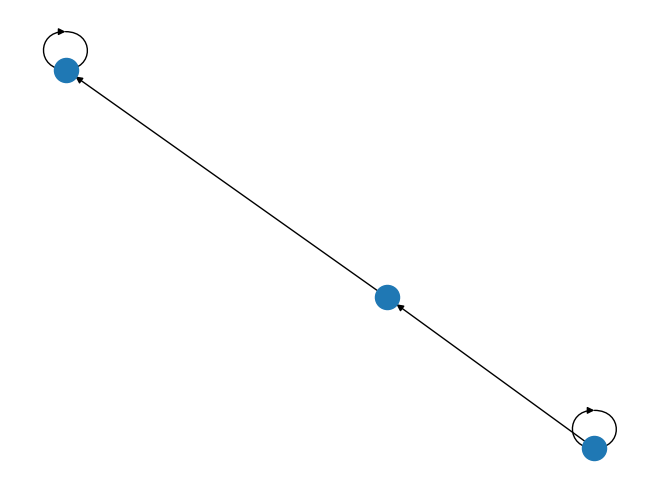

In [10]:
x=torch.tensor([[1],[0],[-1]], dtype=torch.float)
edge_index=torch.tensor([[1,0,0,2],[2,0,1,2]],dtype=torch.long)
from torch_geometric.utils import to_networkx
data=Data(x=x,edge_index=edge_index)
!pip install networkx
import networkx as nx
G=to_networkx(data)
nx.draw(G)

In [11]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [12]:
print(data.num_nodes)
print(data.num_edges)
print(data.is_directed())
print(data.has_self_loops())
print(data.x)
print(data.keys)
print(data.num_features)

3
4
True
True
tensor([[ 1.],
        [ 0.],
        [-1.]])
<bound method BaseData.keys of Data(x=[3, 1], edge_index=[2, 4])>
1


# Example - 2

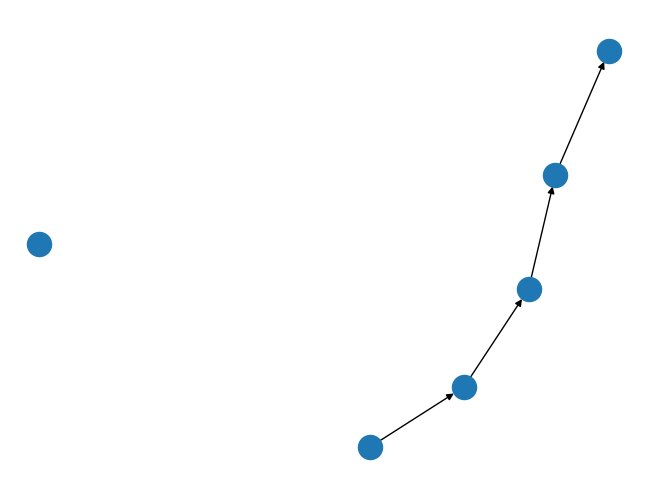

In [13]:
x=torch.tensor([[[1],[1],[1]],[[1],[3],[3]]],dtype=torch.long)
edge_index=torch.tensor([[2,3,4,5],[1,2,3,4]],dtype=torch.float)
data=Data(x=x,edge_index=edge_index)
from torch_geometric.utils import to_networkx
G1=to_networkx(data)
nx.draw(G1)

In [14]:
print(data.num_nodes)
print(data.num_edges)
print(data.num_node_features)
print(data.x)
print(data.edge_index)
print(data)

2
4
1
tensor([[[1],
         [1],
         [1]],

        [[1],
         [3],
         [3]]])
tensor([[2., 3., 4., 5.],
        [1., 2., 3., 4.]])
Data(x=[2, 3, 1], edge_index=[2, 4])


In [15]:
print(x.ndim)
print(edge_index.ndim)

3
2


In [16]:
print(G1.number_of_nodes())
print(G1.number_of_edges())

6
4


# Making the colorful Graphs

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

[[0 1 0]
 [1 0 1]
 [0 1 0]]


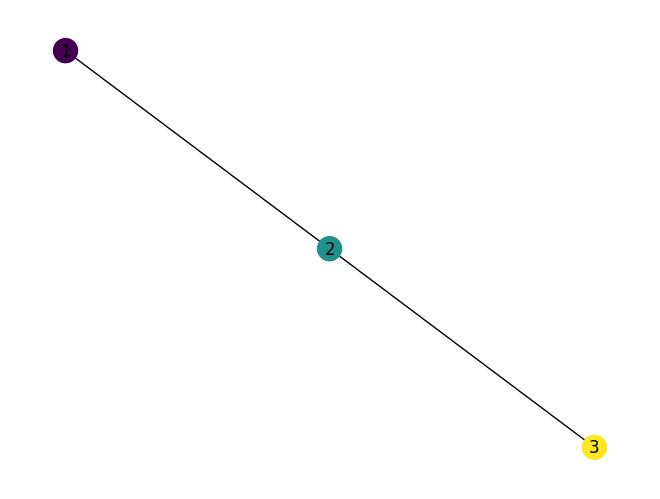

In [18]:
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=G,with_labels=True)
A=nx.adjacency_matrix(G)
print(A.todense())

# Explaining the concept of weighted and non-weighted graphs

In [19]:
G=nx.Graph()
G.add_edge(1,2,weight=1)
G.add_edge(2,3,weight=2)
A=nx.adjacency_matrix(G)
print(A.todense())
print(nx.is_directed(G))
print(nx.is_weighted(G))
G.add_edge(1,1)
print(nx.is_directed(G))
print(nx.is_weighted(G))

[[0 1 0]
 [1 0 2]
 [0 2 0]]
False
True
False
False


# Making the Incidence Matrix

In [20]:
G=nx.Graph()
G.add_edge(1,2,weight=1)
G.add_edge(2,3,weight=5)
G.add_edge(1,1)
G.add_edge(2,2)
G.add_edge(3,3)
I=nx.incidence_matrix(G)
print(I.todense())

[[1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


# Making the Laplacian Matrix

In [21]:
A=nx.adjacency_matrix(G)
print(A.todense())
L=nx.laplacian_matrix(G)
print(L.todense())

[[1 1 0]
 [1 1 5]
 [0 5 1]]
[[ 1 -1  0]
 [-1  6 -5]
 [ 0 -5  5]]


# Making the incidence matrix for The DiGraph

[[1. 0.]
 [1. 1.]
 [0. 1.]]
[1. 1.]


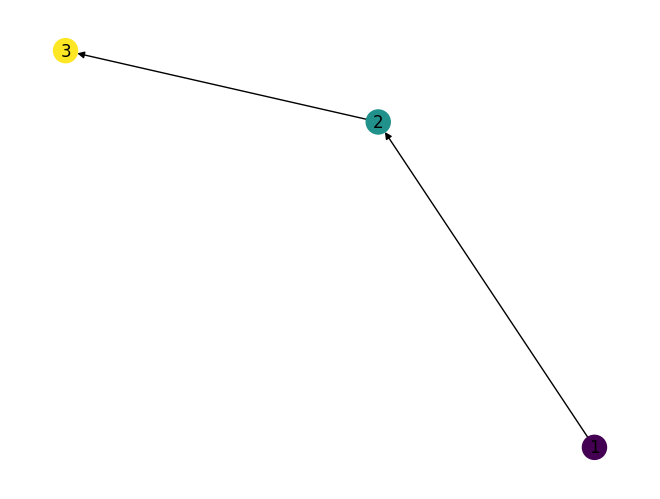

In [22]:
G=nx.DiGraph()
G.add_edge(1,2,weight=1)
G.add_edge(2,3,weight=2)
nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=G,with_labels=True)
I=nx.incidence_matrix(G)
print(I.todense())
print(I.diagonal())

In [23]:
A=nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0]
 [0 0 2]
 [0 0 0]]


In [24]:
G.edges

OutEdgeView([(1, 2), (2, 3)])

In [25]:
G.nodes

NodeView((1, 2, 3))

In [26]:
print(G.number_of_nodes())
print(G.number_of_edges())

3
2


# Explaining the coloring in the directed Graph

[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D')]
['A', 'B', 'C', 'D']


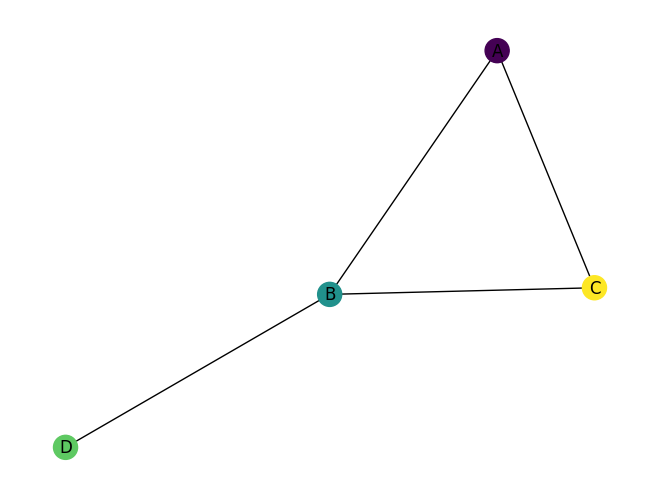

In [27]:
G=nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('C','A'),('D','B')])
print(G.edges)
print(G.nodes)
val_graph={'A':0.1,
           'B':0.2,
           'C':0.3}
values=[]
for node in G.nodes:
  values.append(val_graph.get(node,0.25))
# values=[0.25,0.25,0.25,0.25]
nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=values,with_labels=True)

# Making a particular graph with the edges label also

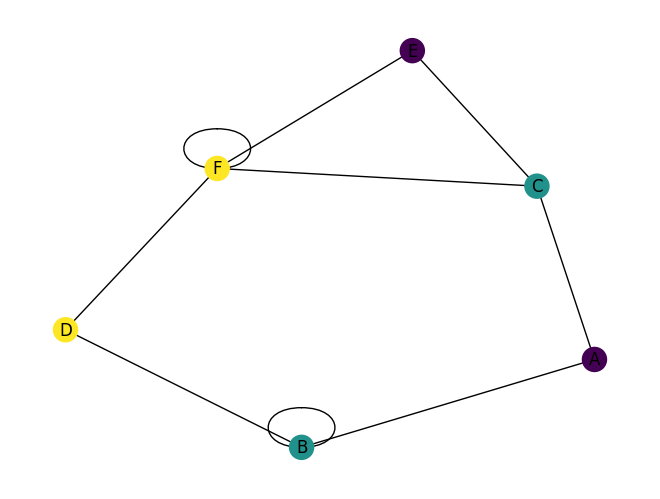

In [28]:
G=nx.Graph()
G.add_edges_from([('A','B'),('B','B'),('B','D'),('D','F'),('F','F'),('F','C'),('F','E'),('E','C'),('C','A')])
value_graph=({'A':0.1,'B':0.2,'C':0.3,'D':0.3,'E':0.2,'F':0.1})
values=[value_graph.get(node,0.25) for node in value_graph]
nx.draw(G,node_color=values,cmap=plt.get_cmap('viridis'),with_labels=True)

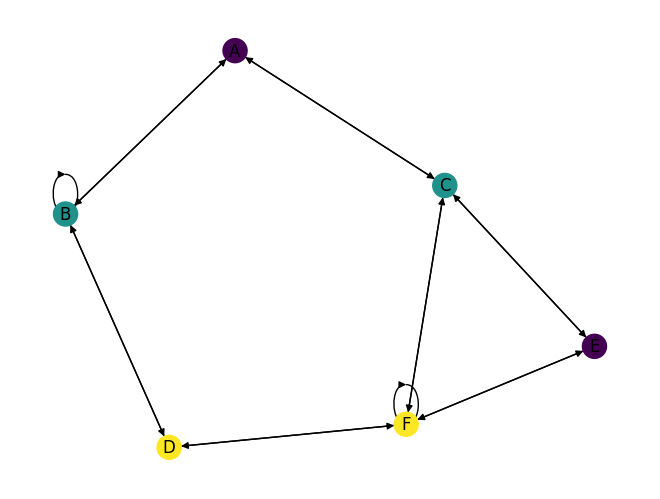

In [29]:
nx.draw(G.to_directed(),node_color=values,cmap=plt.get_cmap('viridis'),with_labels=True)

{('A', 'B'): Text(-0.7902489485838805, -0.013824085401371922, 'e1'),
 ('B', 'B'): Text(-0.9245138896239414, 0.3756060229965613, 'e2'),
 ('B', 'D'): Text(-0.5567937064484955, 0.5611429093079362, 'e3'),
 ('D', 'F'): Text(0.16834918617025568, 0.468805140635087, 'e4'),
 ('F', 'F'): Text(0.525771895613561, 0.19093048565086287, 'e5'),
 ('F', 'C'): Text(0.3847857102204052, -0.15659094807388008, 'e6'),
 ('F', 'E'): Text(0.7628859478067804, -0.10745962150897202, 'e7'),
 ('E', 'C'): Text(0.6218997624136247, -0.454981055233715, 'e8'),
 ('C', 'A'): Text(-0.20609224135828508, -0.4536832877989641, 'e9')}

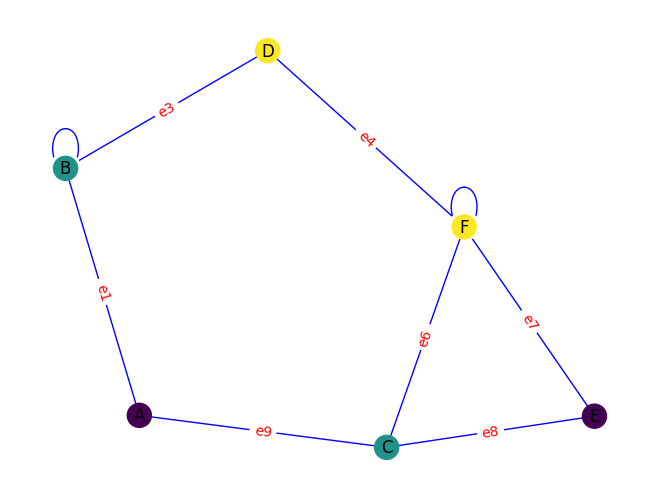

In [30]:
edge_labels={('A','B'):'e1',('B','B'):'e2',('B','D'):'e3',('D','F'):'e4',('F','F'):'e5',('F','C'):'e6',('F','E'):'e7',('E','C'):'e8',('C','A'):'e9'}
pos=nx.spring_layout(G)
nx.draw(G,pos,node_color=values,with_labels=True,edge_color='blue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')

# Random Walk

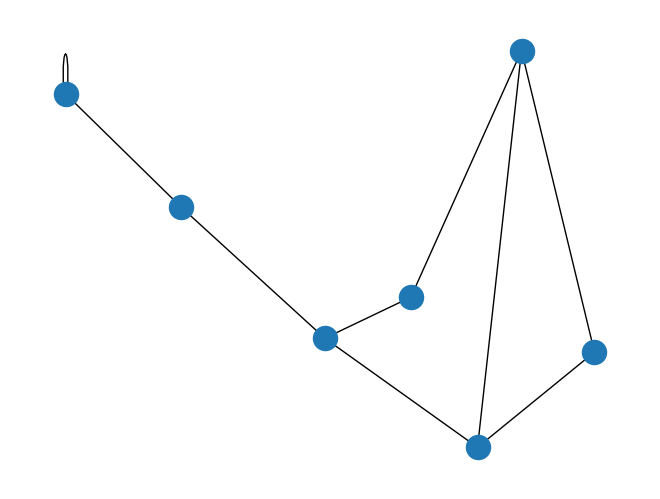

In [31]:
import networkx as nx
G=nx.Graph()
G.add_node(2)
G.add_node(1)
G.add_edge(1,2)
G.add_edge(3,4)
G.add_edge(2,3)
G.add_edge(4,1)
G.add_edge(5,1)
G.add_edge(5,4)
G.add_edge(7,2)
G.add_edge(7,6)
G.add_edge(6,6)
nx.draw(G)


In [32]:
import random
def perform_random_walk(G,node,path_length):
  random_result=[node]
  for i in range(0,(path_length-1)):
    temp=list(G.neighbors(node))
    temp=list(set(temp)-set(random_result))
    if(len(temp)==0):
      break
    random_choice=random.choice(temp)
    node=random_choice
    random_result.append(node)
  return(random_result)

In [33]:
perform_random_walk(G,1,7)

[1, 5, 4, 3, 2, 7, 6]

In [34]:
from tqdm import tqdm
random_walks=[]
for node in tqdm(G.nodes):
  for i in range (3):
    random_walks.append(perform_random_walk(G,node,i+1))
print(len(random_walks))
print(random_walks)

100%|██████████| 7/7 [00:00<00:00, 36336.79it/s]

21
[[2], [2, 3], [2, 3, 4], [1], [1, 4], [1, 2, 3], [3], [3, 2], [3, 2, 1], [4], [4, 1], [4, 5, 1], [5], [5, 4], [5, 1, 2], [7], [7, 2], [7, 2, 3], [6], [6, 7], [6, 7, 2]]


# Importing the understanding the dataset

In [35]:
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub
dataset=KarateClub()
print(f" Number of the Graphs in the dataset: {len(dataset)}")
print(f" Number of the classes in the dataset: {dataset.num_classes}")
print(f" Number of the node features in the dataset: {dataset.num_node_features}")
print(f" Number of the edge features in the dataset: {dataset.num_edge_features}")

 Number of the Graphs in the dataset: 1
 Number of the classes in the dataset: 4
 Number of the node features in the dataset: 34
 Number of the edge features in the dataset: 0


# Importing the data and understanding the data

In [36]:
data=dataset[0]
print(data)
print(f"The node feature of the data{data.x}")
print(f"The edge list of the data{data.edge_index}")
print(f"The output of the data{data.y}")
print(f"The train_mask of the data{data.train_mask}")
print(f"The number of nodes in the data{data.num_nodes}")
print(f"The number of edge in the data{data.num_edges}")
print(f"The average degree in the data {data.num_edges/data.num_nodes}")
print(f"The directed??{data.is_directed()}")
print(f"The train mask sum{data.train_mask.sum()}")
print(f"the features for 1 node {data.x[0]} ")

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
The node feature of the datatensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
The edge list of the datatensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33

# Looking the data in a different manner

In [37]:
print(data.to_dict())
print(data.edge_index.t())

{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3

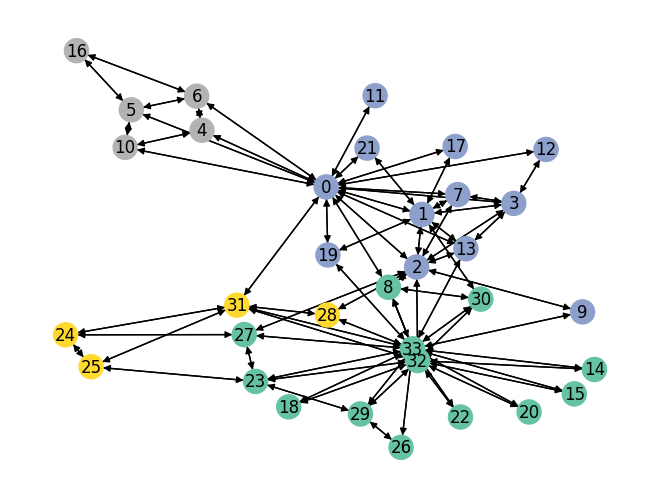

In [38]:
# Visualizing the Graph
from torch_geometric.utils import to_networkx
karate_club_graph=to_networkx(data)
nx.draw(karate_club_graph,node_color=data.y,cmap='Set2',with_labels=True)

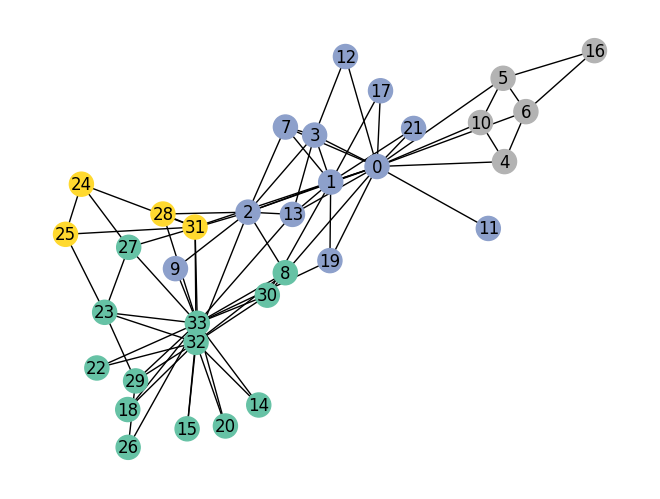

In [39]:
# Visualizing the Graph
from torch_geometric.utils import to_networkx
karate_club_graph=to_networkx(data,to_undirected=True)
nx.draw(karate_club_graph,node_color=data.y,cmap='Set2',with_labels=True)

# GCN

In [51]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
class GCNModule(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=GCNConv(dataset.num_features,4)
    self.conv2=GCNConv(4,4)
    self.conv3=GCNConv(4,2)
    self.classifier=Linear(2,dataset.num_classes)
  def forward(self,x,edge_index):
    h=self.conv1(x,edge_index)
    h=h.tanh()
    h=self.conv2(h,edge_index)
    h=h.tanh()
    h=self.conv3(h,edge_index)
    h=h.tanh()
    out=self.classifier(h)
    return out,h
model=GCNModule()
print(model)

GCNModule(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [52]:
model=GCNModule()
_,h=model(data.x,data.edge_index)
print(h)

tensor([[ 0.0308,  0.0923],
        [ 0.0235,  0.0795],
        [ 0.0261,  0.0947],
        [ 0.0234,  0.0709],
        [ 0.0100,  0.0193],
        [-0.0068,  0.0060],
        [-0.0046,  0.0043],
        [ 0.0162,  0.0622],
        [ 0.0262,  0.0502],
        [ 0.0141,  0.0579],
        [ 0.0099,  0.0192],
        [ 0.0102,  0.0813],
        [ 0.0176,  0.0361],
        [ 0.0193,  0.0656],
        [ 0.0311,  0.0457],
        [ 0.0248,  0.0307],
        [-0.0150, -0.0115],
        [ 0.0051,  0.0421],
        [ 0.0272,  0.0416],
        [ 0.0134,  0.0509],
        [ 0.0332,  0.0408],
        [ 0.0057,  0.0283],
        [ 0.0266,  0.0373],
        [ 0.0299,  0.0304],
        [ 0.0192,  0.0033],
        [ 0.0233, -0.0069],
        [ 0.0220,  0.0363],
        [ 0.0261,  0.0331],
        [ 0.0184,  0.0317],
        [ 0.0316,  0.0392],
        [ 0.0242,  0.0447],
        [ 0.0242,  0.0195],
        [ 0.0578,  0.0801],
        [ 0.0575,  0.1074]], grad_fn=<TanhBackward0>)


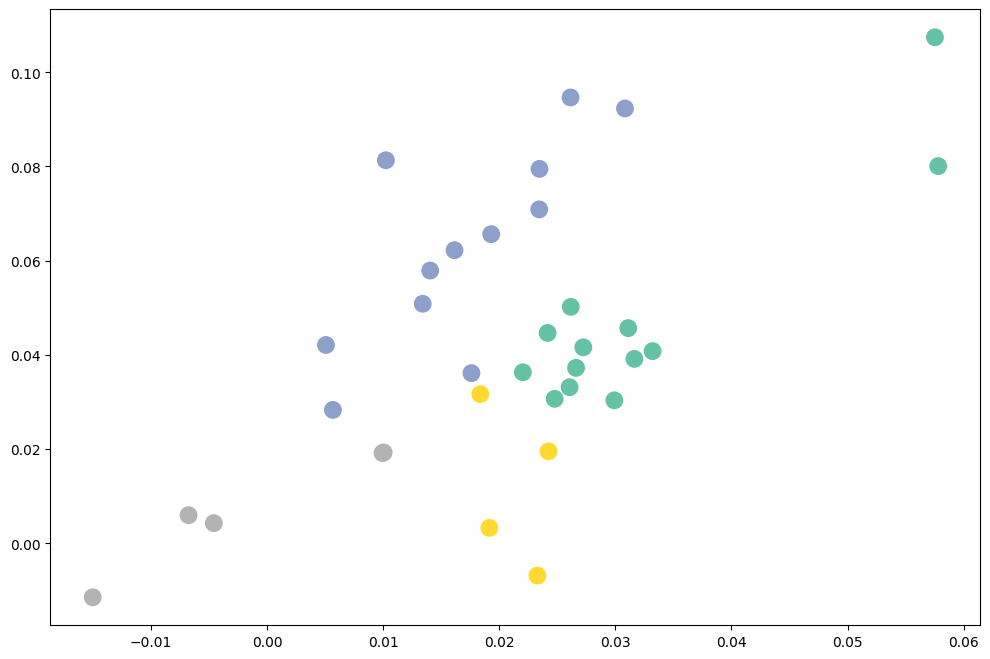

In [55]:
def visualize_embedding(h,color,epoch=None,loss=None):
  plt.figure(figsize=(12,8))
  h=h.detach().cpu().numpy()
  plt.scatter(h[:,0],h[:,1],s=140,c=color,cmap="Set2")
  plt.show()
visualize_embedding(h,data.y)